Usage of numpy fft to extract features for segmentation. Based on:

HARMONIC ANALYSIS OF TIME-SERIES AVHRR NDVI DATA FOR CHARACTERIZING US GREAT PLAINS LAND USE/LAND COVER

1. Data

Se utiliza la ruta:

`/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data`


No se usa la funcionalidad del datacube (gridworkflow load) pues se requiere que estén en la ruta:

`/shared_volume/datacube/datacube_ingest/*/mexico/`

pero el `shared_volume` es de `LUSTRE` y no de la máquina de Ixchel... se prefiere no tener los datos en la ruta de la línea anterior y mejor usar la de `tasks`... al final el load no importa para la creación de las series de tiempo...



In [1]:
from datetime import datetime
import datetime as dt
import xarray as xr
import numpy as np
import glob

from madmex.wrappers import gwf_query
from madmex.util.xarray import to_float, to_int
from datacube.api import GridWorkflow


In [2]:
path = '/LUSTRE/MADMEX/tasks/2019_tasks/generacion_datos_entrenamiento_cultivos/examples_source_data/' 

In [3]:
#sr_0_no_chunks = xr.open_mfdataset(path +'/LS5*.nc',
#                                  data_vars='minimal', coords='minimal',
#                                  combine='by_coords')

#for sentinel2:
sr_0_no_chunks = xr.open_mfdataset(path +'/s2_l2a_10m_scl_s3_39_-30*.nc',
                                  data_vars='minimal', coords='minimal',
                                  combine='by_coords')


In [4]:
sr_0_no_chunks

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(1, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(1,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3
    h

In [5]:
sr_0_no_chunks.time

<xarray.DataArray 'time' (time: 10)>
array(['2019-01-07T17:18:02.000000000', '2019-02-06T17:18:04.000000000',
       '2019-02-13T17:08:09.000000000', '2019-02-16T17:17:57.000000000',
       '2019-02-16T17:18:04.000000000', '2019-02-26T17:18:03.000000000',
       '2019-02-26T17:18:11.000000000', '2019-03-08T17:18:02.000000000',
       '2019-03-28T17:18:07.000000000', '2019-04-04T17:08:13.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [6]:
sr_0 = sr_0_no_chunks.chunk({'time': -1})

In [7]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(10,), meta=np.ndarray>
Attributes:
    date_created:           2019-10-09T15:02:04.310545
    Conventions:            CF-1.6, ACDD-1.3

In [8]:
sr_0['ndvi'] = ((sr_0.nir-sr_0.red)/(sr_0.nir+sr_0.red))

In [9]:
sr_0

<xarray.Dataset>
Dimensions:   (time: 10, x: 5002, y: 5002)
Coordinates:
  * y         (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x         (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time      (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13
Data variables:
    crs       int32 -2147483647
    blue      (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    green     (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    red       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    nir       (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    pixel_qa  (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
    dataset   (time) |S4869 dask.array<chunksize=(10,), meta=np.ndarray>
    ndvi      (time, y, x) float32 dask.array<chunksize=(10, 5002, 5002), meta=np.ndarray>
Attributes:
    date

In [10]:
begin="2019-01-1"

In [11]:
begin_time = datetime.strptime(begin, '%Y-%m-%d')

In [12]:
#if using sentinel change to 10D, if using landsat change to 80D
ts_1 = sr_0.ndvi.resample(time='10D', 
                          loffset=begin_time - 
                          datetime.utcfromtimestamp(sr_0['time'][0].values.astype(datetime)*1e-9)).nearest().interpolate_na('time')

In [13]:
ts_1

<xarray.DataArray 'ndvi' (time: 9, y: 5002, x: 5002)>
dask.array<transpose, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 5002, 5002), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-11 ... 2019-03-22
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [14]:
ts_1['time']

<xarray.DataArray 'time' (time: 9)>
array(['2019-01-01T00:00:00.000000000', '2019-01-11T00:00:00.000000000',
       '2019-01-21T00:00:00.000000000', '2019-01-31T00:00:00.000000000',
       '2019-02-10T00:00:00.000000000', '2019-02-20T00:00:00.000000000',
       '2019-03-02T00:00:00.000000000', '2019-03-12T00:00:00.000000000',
       '2019-03-22T00:00:00.000000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-01-01 2019-01-11 ... 2019-03-22
Attributes:
    standard_name:  time
    long_name:      Time, unix time-stamp
    axis:           T

In [15]:
times=np.datetime_as_string(ts_1['time'],unit='D')

In [16]:
times

array(['2019-01-01', '2019-01-11', '2019-01-21', '2019-01-31',
       '2019-02-10', '2019-02-20', '2019-03-02', '2019-03-12',
       '2019-03-22'], dtype='<U28')

In [17]:
ts_1_times_clean = ts_1.assign_coords({'time':times})

In [18]:
ts_1_times_clean

<xarray.DataArray 'ndvi' (time: 9, y: 5002, x: 5002)>
dask.array<transpose, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 5002, 5002), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U28 '2019-01-01' '2019-01-11' ... '2019-03-12' '2019-03-22'
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06

In [19]:
sr_0.coords

Coordinates:
  * y        (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x        (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
  * time     (time) datetime64[ns] 2019-01-07T17:18:02 ... 2019-04-04T17:08:13

In [20]:
sr_0.crs

<xarray.DataArray 'crs' ()>
array(-2147483647, dtype=int32)
Attributes:
    grid_mapping_name:              lambert_conformal_conic
    standard_parallel:              [17.5 29.5]
    latitude_of_projection_origin:  12.0
    longitude_of_central_meridian:  -102.0
    false_easting:                  2500000.0
    false_northing:                 0.0
    semi_major_axis:                6378137.0
    semi_minor_axis:                6378136.027241431
    long_name:                      unnamed
    inverse_flattening:             6556752.3141
    crs_wkt:                        PROJCS["unnamed",GEOGCS["WGS 84",DATUM["u...
    spatial_ref:                    PROJCS["unnamed",GEOGCS["WGS 84",DATUM["u...
    GeoTransform:                   [ 2.92794e+06  1.00000e+01  0.00000e+00  ...

In [21]:
sr_0.crs.attrs['crs_wkt']

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]]'

In [22]:
sr_0.crs.attrs['spatial_ref']

'PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS84",6378137,6556752.3141]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433]],PROJECTION["Lambert_Conformal_Conic_2SP"],PARAMETER["standard_parallel_1",17.5],PARAMETER["standard_parallel_2",29.5],PARAMETER["latitude_of_origin",12],PARAMETER["central_meridian",-102],PARAMETER["false_easting",2500000],PARAMETER["false_northing",0]]'

In [23]:
sr_0.crs.attrs['GeoTransform']

array([ 2.92794e+06,  1.00000e+01,  0.00000e+00,  9.76140e+05,
        0.00000e+00, -1.00000e+01])

# Computing FFT via dask 

In [24]:
import dask.array as da

In [25]:
ts_da = da.from_array(ts_1_times_clean, chunks=(9, 1667, 1667))

In [26]:
ts_da

dask.array<array, shape=(9, 5002, 5002), dtype=float32, chunksize=(9, 1667, 1667), chunktype=xarray.DataArray>

In [27]:
fft_ts_1 = da.fft.fft(ts_da,axis=0)

In [28]:
fft_ts_1

dask.array<fft, shape=(9, 5002, 5002), dtype=complex128, chunksize=(9, 1667, 1667), chunktype=numpy.ndarray>

See: 

https://github.com/CONABIO/antares3-docker/tree/master/antares3-datacube/conabio_deployment#deploy-services-of-scheduler-and-workers-with-dask--distributed-and-jupyerlab-in-scheduler

to deploy dask cluster

In [29]:
from dask.distributed import Client

In [30]:
scheduler_file = '/shared_volume/scheduler.json'

In [31]:
client = Client(scheduler_file=scheduler_file)

In [32]:
client

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 5 Cores: 5 Memory: 30.00 GB


In [37]:
client.restart()

Client Scheduler: tcp://10.0.0.3:8786 Dashboard: http://10.0.0.3:8787/status,Cluster Workers: 15 Cores: 15 Memory: 120.00 GB


In [ ]:
fft_ts_datarray = fft_ts_1.compute()

In [42]:
import matplotlib.pyplot as plt

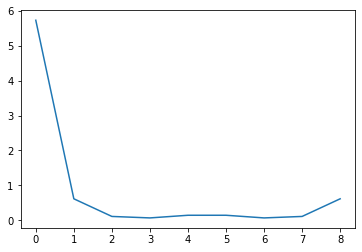

In [52]:
plt.plot(abs(fft_ts_datarray[:,0,0]))

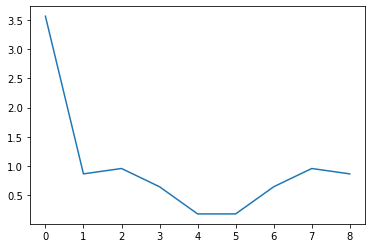

In [55]:
plt.plot(abs(fft_ts_datarray[:,1000,1000]))

In [39]:
fft_ts_datarray

array([[[ 5.72979182e+00+0.j        ,  5.53396589e+00+0.j        ,
          5.38889673e+00+0.j        , ...,  3.49225093e+00+0.j        ,
          3.43571121e+00+0.j        ,  3.41448290e+00+0.j        ],
        [ 5.57775426e+00+0.j        ,  5.56276923e+00+0.j        ,
          5.41545570e+00+0.j        , ...,  3.48314635e+00+0.j        ,
          3.35796524e+00+0.j        ,  3.36564318e+00+0.j        ],
        [ 5.72777718e+00+0.j        ,  5.65509033e+00+0.j        ,
          5.40458375e+00+0.j        , ...,  3.18401712e+00+0.j        ,
          3.17387637e+00+0.j        ,  3.32945677e+00+0.j        ],
        ...,
        [ 5.59178859e+00+0.j        ,  6.25526100e+00+0.j        ,
          6.37598753e+00+0.j        , ...,             nan+0.j        ,
                     nan+0.j        ,             nan+0.j        ],
        [ 6.06175095e+00+0.j        ,  6.32435131e+00+0.j        ,
          6.34543890e+00+0.j        , ...,             nan+0.j        ,
                    

In [66]:
fft_ts_datarray.shape

(9, 5002, 5002)

In [63]:
fft_ts_datarray_abs = da.absolute(fft_ts_datarray)

In [64]:
fft_ts_datarray_abs

array([[[5.72979182, 5.53396589, 5.38889673, ..., 3.49225093,
         3.43571121, 3.4144829 ],
        [5.57775426, 5.56276923, 5.4154557 , ..., 3.48314635,
         3.35796524, 3.36564318],
        [5.72777718, 5.65509033, 5.40458375, ..., 3.18401712,
         3.17387637, 3.32945677],
        ...,
        [5.59178859, 6.255261  , 6.37598753, ...,        nan,
                nan,        nan],
        [6.06175095, 6.32435131, 6.3454389 , ...,        nan,
                nan,        nan],
        [6.14097309, 6.31049663, 6.33320928, ...,        nan,
                nan,        nan]],

       [[0.61289336, 0.71131693, 0.58212085, ..., 0.23937499,
         0.26425114, 0.27167644],
        [0.65668221, 0.53361291, 0.49665178, ..., 0.29268402,
         0.29036182, 0.3443859 ],
        [0.62268532, 0.48330461, 0.4786111 , ..., 0.37799594,
         0.31146701, 0.42493717],
        ...,
        [0.11844492, 0.05749088, 0.04671297, ...,        nan,
                nan,        nan],
        [0.0

In [65]:
fft_ts_datarray_abs.shape

(9, 5002, 5002)

In [447]:
fft_ts_datarray_max_freq = np.max(fft_ts_datarray_abs,axis=0)

In [448]:
fft_ts_datarray_max_freq

array([[5.72979182, 5.53396589, 5.38889673, ..., 3.49225093, 3.43571121,
        3.4144829 ],
       [5.57775426, 5.56276923, 5.4154557 , ..., 3.48314635, 3.35796524,
        3.36564318],
       [5.72777718, 5.65509033, 5.40458375, ..., 3.18401712, 3.17387637,
        3.32945677],
       ...,
       [5.59178859, 6.255261  , 6.37598753, ...,        nan,        nan,
               nan],
       [6.06175095, 6.32435131, 6.3454389 , ...,        nan,        nan,
               nan],
       [6.14097309, 6.31049663, 6.33320928, ...,        nan,        nan,
               nan]])

In [449]:
fft_ts_datarray_max_freq = fft_ts_datarray_max_freq*10000

In [450]:
fft_ts_datarray_max_freq

array([[57297.91820049, 55339.65885639, 53888.96733522, ...,
        34922.50926793, 34357.11205006, 34144.8289901 ],
       [55777.54259109, 55627.6923418 , 54154.55698967, ...,
        34831.46347106, 33579.65239324, 33656.43177647],
       [57277.77183056, 56550.90332031, 54045.83752155, ...,
        31840.1711667 , 31738.76369372, 33294.56765205],
       ...,
       [55917.88589954, 62552.61003971, 63759.87529755, ...,
                   nan,            nan,            nan],
       [60617.50948429, 63243.5131073 , 63454.3889761 , ...,
                   nan,            nan,            nan],
       [61409.73091125, 63104.96628284, 63332.09276199, ...,
                   nan,            nan,            nan]])

In [451]:
fft_ts_datarray_max_freq[np.where(np.isnan(fft_ts_datarray_max_freq))] = 0

In [452]:
fft_ts_datarray_max_freq[3707,5001]

0.0

In [453]:
type(fft_ts_datarray_max_freq[3707,5001])

numpy.float64

In [454]:
np.isnan(fft_ts_datarray_max_freq[3707,5001])

False

In [455]:
fft_ts_datarray_max_freq.shape

(5002, 5002)

In [456]:
from numpy import newaxis

In [457]:
fft_ts_datarray_max_freq[:,:].real[:,:,newaxis].shape

(5002, 5002, 1)

see: https://github.com/CONABIO/antares3/blob/rapideye-support/madmex/segmentation/__init__.py#L36 **for dimension order**

In [606]:
#si es landsat:
#fft_ts_xr = xr.DataArray(fft_ts_datarray[0,:,:].real[:,:,newaxis], dims=['x', 'y','time'],
#                         coords= {'y': sr_0.coords['y'],
#                                  'x': sr_0.coords['x']})

#si es sentinel2:
fft_ts_xr = xr.DataArray(fft_ts_datarray_max_freq[:,:].real[:,:,newaxis], dims = ['x','y','time'],
                         coords= {'y': sr_0.coords['y'],
                                  'x': sr_0.coords['x']})

In [607]:
fft_ts_xr.name = 'fft_numpy'

In [608]:
fft_ts_xr

<xarray.DataArray 'fft_numpy' (x: 5002, y: 5002, time: 1)>
array([[[57297.91820049],
        [55339.65885639],
        [53888.96733522],
        ...,
        [34922.50926793],
        [34357.11205006],
        [34144.8289901 ]],

       [[55777.54259109],
        [55627.6923418 ],
        [54154.55698967],
        ...,
        [34831.46347106],
        [33579.65239324],
        [33656.43177647]],

       [[57277.77183056],
        [56550.90332031],
        [54045.83752155],
        ...,
        [31840.1711667 ],
        [31738.76369372],
        [33294.56765205]],

       ...,

       [[55917.88589954],
        [62552.61003971],
        [63759.87529755],
        ...,
        [    0.        ],
        [    0.        ],
        [    0.        ]],

       [[60617.50948429],
        [63243.5131073 ],
        [63454.3889761 ],
        ...,
        [    0.        ],
        [    0.        ],
        [    0.        ]],

       [[61409.73091125],
        [63104.96628284],
        [63332.092761

In [609]:
fft_ts_xr.attrs['nodata']=0

In [610]:
fft_ts_xr = fft_ts_xr.to_dataset()

In [611]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) float64 5.73e+04 5.534e+04 5.389e+04 ... 0.0 0.0 0.0

In [612]:
fft_ts_xr.attrs['nodata'] = 0

In [616]:
def to_int_32(x):
    x_int = x.where(xr.DataArray.notnull(x), x.attrs['nodata'])
    return x_int.astype('int32')

In [617]:
fft_ts_xr = fft_ts_xr.apply(to_int_32)

In [618]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) int32 57297 55339 53888 51546 52494 ... 0 0 0 0 0

In [619]:
from affine import Affine
from datacube.utils.geometry import CRS

See https://rasterio.readthedocs.io/en/stable/topics/migrating-to-v1.html **for relation between affine and geotransform**

In [620]:
l_geotransform = list(sr_0.crs.attrs['GeoTransform'])

In [621]:
l_affine = [l_geotransform[1], l_geotransform[2], l_geotransform[0],l_geotransform[4],l_geotransform[5],l_geotransform[3]]

In [622]:
l_affine

[10.0, 0.0, 2927940.0, 0.0, -10.0, 976140.0]

In [623]:
fft_ts_xr.attrs['affine'] = Affine(*l_affine)

In [624]:
fft_ts_xr.attrs['nodata'] = 0

In [625]:
fft_ts_xr.affine

Affine(10.0, 0.0, 2927940.0,
       0.0, -10.0, 976140.0)

In [626]:
fft_ts_xr.attrs['crs'] = CRS(sr_0.crs.attrs['crs_wkt'])

In [627]:
fft_ts_xr

<xarray.Dataset>
Dimensions:    (time: 1, x: 5002, y: 5002)
Coordinates:
  * y          (y) float64 9.761e+05 9.761e+05 9.761e+05 ... 9.261e+05 9.261e+05
  * x          (x) float64 2.928e+06 2.928e+06 2.928e+06 ... 2.978e+06 2.978e+06
Dimensions without coordinates: time
Data variables:
    fft_numpy  (x, y, time) int32 57297 55339 53888 51546 52494 ... 0 0 0 0 0
Attributes:
    affine:   | 10.00, 0.00, 2927940.00|\n| 0.00,-10.00, 976140.00|\n| 0.00, ...
    nodata:   0
    crs:      PROJCS["unnamed",GEOGCS["WGS 84",DATUM["unknown",SPHEROID["WGS8...

# Run Segmentation

In [628]:
from django.contrib.gis.geos.geometry import GEOSGeometry
import gc
from importlib import import_module
import os

from madmex.settings import TEMP_DIR
from madmex.util import parser_extra_args


In [640]:
algorithm = 'bis' #'slic'
name = 'fft_test_27_11_2019_sentinel2'
extra_args = parser_extra_args(['t=40','s=0.5','c=0.7']) #for slic: parser_extra_args(['n_segments=10000', 'compactness=0.5'])

In [630]:
band_list = ['fft_numpy']

In [631]:
try:
    module = import_module('madmex.segmentation.%s' % algorithm)
    Segmentation = module.Segmentation
except ImportError as e:
    raise ValueError('Invalid model argument')

In [632]:
path = os.path.join(TEMP_DIR) + '/segmentation_results/'

In [633]:
path

'/shared_volume/temp/segmentation_results/'

In [634]:
if not os.path.exists(path):
    os.makedirs(path)

In [635]:
seg = Segmentation.from_geoarray(fft_ts_xr, **extra_args)

In [636]:
seg.geobox.extent.wkt

'POLYGON ((2927940 976140,2927940 926120,2977960 926120,2977960 976140,2927940 976140))'

In [637]:
seg.segment()


In [638]:
seg.segments_array

array([[3052942, 3052942, 3054428, ..., 3052467, 3052467, 3052467],
       [3052942, 3052942, 3054428, ..., 3052467, 3052467, 3052467],
       [3052942, 3052942, 3054428, ..., 3054427, 3054427, 3052467],
       ...,
       [   2432,       0,       0, ...,    1802,    1802,    1802],
       [      0,       0,       0, ...,    1802,    1802,    1802],
       [      0,       0,       0, ...,    1802,    1802,    1802]],
      dtype=int32)

In [639]:
fc = seg.polygonize()

In [641]:
name_file = name + '_max_values.shp'

In [642]:
name_file

'fft_test_27_11_2019_sentinel2_max_values.shp'

In [643]:
shp_path = seg.to_shapefile(filename=path + '/' +name_file, fc=fc)


In [ ]:
shp_path